In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import pandas as pd
import numpy as np

In [78]:
df = pd.read_csv('/content/drive/MyDrive/MFG 598/Final Project/dataset.csv')
df.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [80]:
df.isnull().sum()

,0
Text,0
Label,0


In [81]:
df.duplicated().sum()

98

In [82]:
# we have to delete the repeated lines
df = df.drop_duplicates()
df.shape

(2127, 2)

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

Label
0    403
1    505
2    347
3    369
4    503
Name: count, dtype: int64


<ipython-input-84-2baeba6443c5>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Politics", "Sport", "Technology", "Entertainment", "Business"])


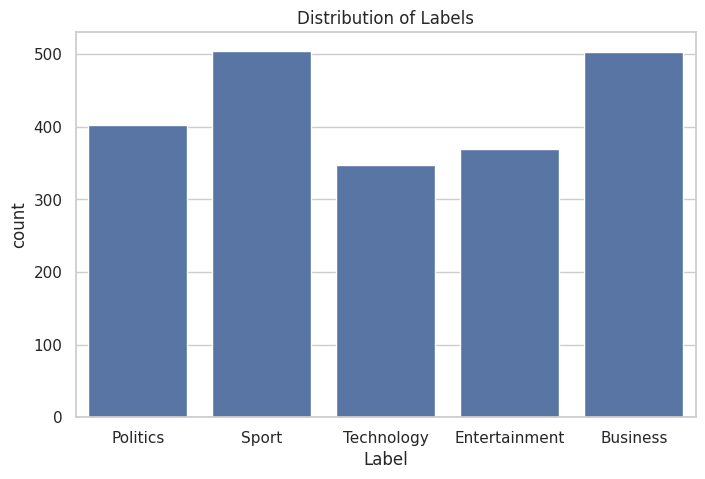

In [84]:
print(df.Label.value_counts().sort_index())
fig, ax=plt.subplots(figsize=(8,5))
sns.barplot(x=df.Label.value_counts().index, y=df.Label.value_counts(), ax=ax)
ax.set_title("Distribution of Labels")
ax.set_xticklabels(["Politics", "Sport", "Technology", "Entertainment", "Business"])
plt.show()

Text Cleaning

In [85]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
def clean_text(text):
    text = re.sub('\n', " ", text)
    text = re.sub(r'[^a-zA-Z]', " ", text)
    text = re.sub(r'\s+', " ", text)
    text = text.lower()
    text = text.split()
    text = [j for j in text if len(text) > 1]
    text = [i for i in text if not i in set(stopwords.words("english"))]
    text = " ".join(text)
    return text

df["cleaned_text"] = df["Text"].apply(clean_text)

In [87]:
df.head()

,Text,Label,cleaned_text
0,Budget to set scene for election\n \n Gordon B...,0,budget set scene election gordon brown seek pu...
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs regiments decision military chiefs...
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split id cards michael howard de...
3,Observers to monitor UK election\n \n Minister...,0,observers monitor uk election ministers invite...
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target ex chat show...


Text statistics

In [88]:
df["word_count"] = df["cleaned_text"].apply(lambda x: len(x.split()))

df["text_length"] = df["cleaned_text"].apply(lambda x: len(str(x)))

df.head()

,Text,Label,cleaned_text,word_count,text_length
0,Budget to set scene for election\n \n Gordon B...,0,budget set scene election gordon brown seek pu...,308,2163
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs regiments decision military chiefs...,273,2078
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split id cards michael howard de...,316,2178
3,Observers to monitor UK election\n \n Minister...,0,observers monitor uk election ministers invite...,291,2237
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target ex chat show...,269,1833


In [89]:
df.groupby('Label').describe()

word_count                                                             \
           count        mean         std   min    25%    50%    75%     max   
Label                                                                         
0          403.0  254.679901  154.416424  48.0  182.0  251.0  297.5  2203.0   
1          505.0  182.978218  104.324649  62.0  114.0  154.0  224.0   930.0   
2          347.0  292.066282  129.308426  96.0  206.5  268.0  357.0  1466.0   
3          369.0  192.376694  138.266565  83.0  132.0  157.0  208.0  1777.0   
4          503.0  193.272366   77.771625  75.0  137.0  178.0  228.0   510.0   

      text_length                                                           \
            count         mean          std    min     25%     50%     75%   
Label                                                                        
0           403.0  1837.148883  1107.768077  340.0  1311.5  1801.0  2155.5   
1           505.0  1259.530693   714.180746  439.0   787.0  1079.0  1523.0   
2           347.0  2079.564841   910.098390  648.0  1456.5  1890.0  2589.5   
3           369.0  1329.907859   942.519892  550.0   903.0  1082.0  1447.0   
4           503.0  1391.568588   569.946327  537.0   983.5  1278.0  1661.0   

                
           max  
Label           
0      16135.0  
1       6365.0  
2      10047.0  
3      11878.0  
4       3720.0

In [90]:
df = df.loc[df['word_count'] >= 75]
df = df.loc[df['word_count'] <= 760]
df.groupby('Label').describe()

word_count                                                             \
           count        mean         std   min    25%    50%     75%    max   
Label                                                                         
0          399.0  244.208020   81.986390  83.0  182.0  251.0  297.00  543.0   
1          491.0  182.955193   94.647887  75.0  117.0  156.0  226.50  630.0   
2          345.0  287.092754  109.238977  96.0  206.0  268.0  357.00  686.0   
3          366.0  182.486339   81.321574  83.0  132.0  156.0  207.75  677.0   
4          503.0  193.272366   77.771625  75.0  137.0  178.0  228.00  510.0   

      text_length                                                          \
            count         mean         std    min     25%     50%     75%   
Label                                                                       
0           399.0  1762.716792  590.103600  560.0  1311.5  1799.0  2149.0   
1           491.0  1259.476578  650.787379  485.0   807.5  1083.0  1536.5   
2           345.0  2045.672464  779.141918  648.0  1456.0  1889.0  2573.0   
3           366.0  1263.292350  568.322409  550.0   901.5  1079.5  1428.5   
4           503.0  1391.568588  569.946327  537.0   983.5  1278.0  1661.0   

               
          max  
Label          
0      3968.0  
1      4336.0  
2      4933.0  
3      4926.0  
4      3720.0

In [91]:
df["word_count"] = df["cleaned_text"].apply(lambda x: len(x.split()))

df["text_length"] = df["cleaned_text"].apply(lambda x: len(str(x)))

df["stopwords_count"] = df["Text"].apply(lambda x: len([i for i in x.split() if i in set(stopwords.words("english"))]))

df["punct_count"] = df["Text"].apply(lambda x: len([i for i in x if i in string.punctuation]))

df["caps_count"] = df["Text"].apply(lambda x: len([i for i in str(x) if i.isupper()]))

df.head()

,Text,Label,cleaned_text,word_count,text_length,stopwords_count,punct_count,caps_count
0,Budget to set scene for election\n \n Gordon B...,0,budget set scene election gordon brown seek pu...,308,2163,200,71,85
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs regiments decision military chiefs...,273,2078,204,54,85
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split id cards michael howard de...,316,2178,201,81,99
3,Observers to monitor UK election\n \n Minister...,0,observers monitor uk election ministers invite...,291,2237,176,67,81
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target ex chat show...,269,1833,163,88,138


In [92]:
grouped_text = df.groupby("Label").agg({"word_count": "mean",
                                        "text_length": "mean",
                                        "stopwords_count": "mean",
                                        "punct_count": "mean",
                                        "caps_count": "mean"})
grouped_text = grouped_text.reset_index(drop=True)
grouped_text

,word_count,text_length,stopwords_count,punct_count,caps_count
0,244.208020,1762.716792,168.837093,65.152882,78.100251
1,182.955193,1259.476578,127.323829,60.038697,74.346232
2,287.092754,2045.672464,194.162319,73.171014,81.527536
3,182.486339,1263.292350,110.333333,53.352459,78.461749
4,193.272366,1391.568588,117.924453,56.699801,61.242545


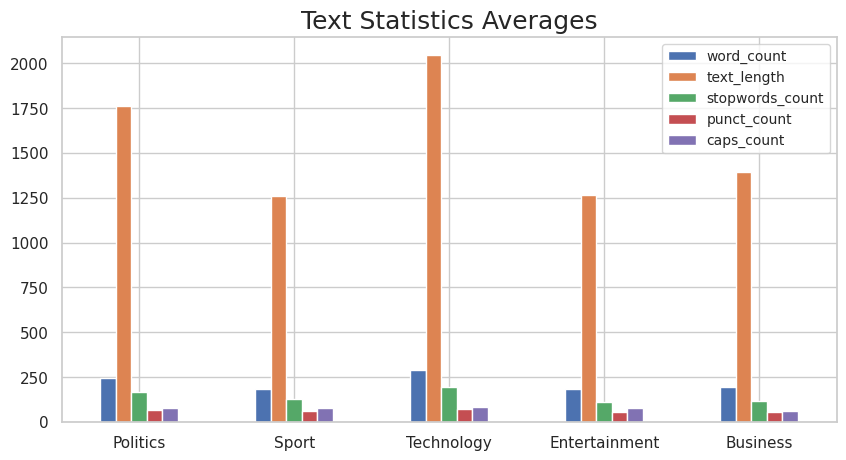

In [93]:
fig, ax=plt.subplots(figsize=(10,5))
grouped_text.plot(kind="bar", ax=ax)
ax.set_xticklabels(["Politics", "Sport", "Technology", "Entertainment", "Business"])
ax.set_title("Text Statistics Averages", fontsize=18)
ax.legend(fontsize="small")
plt.xticks(rotation=0)
plt.show()

In [94]:
from wordcloud import WordCloud, STOPWORDS

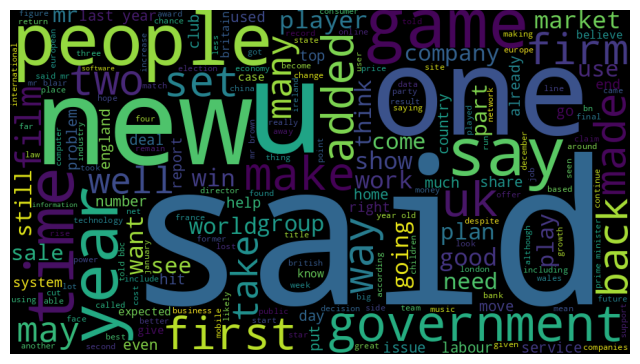

In [95]:
all_cleaned_text = " ".join(df["cleaned_text"])
word_cld = WordCloud(width=900, height=500).generate(all_cleaned_text)
plt.figure(figsize=(8,6))
plt.imshow(word_cld)
plt.axis("off")
plt.show()

Doc2Vec

In [96]:
df.to_csv("Clean_data.csv")

In [97]:
import pandas as pd
from sentence_transformers import SentenceTransformer

# Initialize the pretrained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example paragraphs
paragraphs = list(df['cleaned_text'])

# Compute embeddings for the paragraphs
embeddings = model.encode(paragraphs)

# Convert embeddings into a DataFrame
df = pd.DataFrame(embeddings, columns=[f"dim_{i+1}" for i in range(embeddings.shape[1])])
df['paragraph'] = paragraphs  # Add the original paragraph text for reference

# Save the DataFrame to a CSV file
# df.to_csv("paragraph_embeddings.csv", index=False)

# Display the DataFrame
print(df.head())


      dim_1     dim_2     dim_3     dim_4     dim_5     dim_6     dim_7  \
0  0.028230 -0.087460  0.032949 -0.005270  0.101067  0.069314  0.014545   
1 -0.021022 -0.137131  0.016136 -0.017498  0.059423  0.005345 -0.045749   
2  0.008757 -0.023134 -0.034317  0.006537  0.047752  0.084768  0.004318   
3 -0.015843 -0.112420  0.030357  0.011467  0.075217  0.037330  0.003962   
4 -0.040083 -0.112120  0.052029 -0.038194  0.044197  0.080226  0.050934   

      dim_8     dim_9    dim_10  ...   dim_376   dim_377   dim_378   dim_379  \
0 -0.027855 -0.146366  0.017820  ... -0.005916 -0.083318  0.001510  0.014335   
1 -0.031413 -0.063268  0.045272  ...  0.033003 -0.016151  0.007671 -0.013765   
2 -0.057074 -0.092312  0.003696  ...  0.011727 -0.019918  0.007464  0.030815   
3 -0.028048 -0.093794  0.033428  ...  0.028703  0.035984  0.015660  0.056627   
4 -0.096861 -0.143104 -0.005235  ...  0.032371 -0.042570  0.029977  0.011040   

    dim_380   dim_381   dim_382   dim_383   dim_384  \
0 -0.012068  

In [98]:
import pickle
pickle.dump(model, open('sentenseTransformer.pkl', 'wb'))

In [99]:
df.head()

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,dim_376,dim_377,dim_378,dim_379,dim_380,dim_381,dim_382,dim_383,dim_384,paragraph
0,0.028230,-0.087460,0.032949,-0.005270,0.101067,0.069314,0.014545,-0.027855,-0.146366,0.017820,...,-0.005916,-0.083318,0.001510,0.014335,-0.012068,0.057156,-0.055388,-0.032991,0.020719,budget set scene election gordon brown seek pu...
1,-0.021022,-0.137131,0.016136,-0.017498,0.059423,0.005345,-0.045749,-0.031413,-0.063268,0.045272,...,0.033003,-0.016151,0.007671,-0.013765,0.057186,0.020617,-0.119576,-0.068275,0.003393,army chiefs regiments decision military chiefs...
2,0.008757,-0.023134,-0.034317,0.006537,0.047752,0.084768,0.004318,-0.057074,-0.092312,0.003696,...,0.011727,-0.019918,0.007464,0.030815,-0.035614,0.028818,-0.020699,-0.036650,0.056896,howard denies split id cards michael howard de...
3,-0.015843,-0.112420,0.030357,0.011467,0.075217,0.037330,0.003962,-0.028048,-0.093794,0.033428,...,0.028703,0.035984,0.015660,0.056627,0.010184,0.010327,-0.052879,-0.034929,-0.008078,observers monitor uk election ministers invite...
4,-0.040083,-0.112120,0.052029,-0.038194,0.044197,0.080226,0.050934,-0.096861,-0.143104,-0.005235,...,0.032371,-0.042570,0.029977,0.011040,0.071551,-0.046721,-0.009843,-0.035061,0.005234,kilroy names election seat target ex chat show...


PCA

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [101]:
pca_num_components = 2

pca = PCA(n_components=pca_num_components)
reduced_data = pca.fit_transform(df.iloc[:,:-1])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
results


,pca1,pca2
0,-0.073110,-0.514303
1,0.099182,-0.323010
2,-0.164664,-0.463920
3,-0.061683,-0.442289
4,0.116586,-0.358509
...,...,...
2099,-0.247161,0.215447
2100,-0.186900,0.127888
2101,-0.239818,-0.189396
2102,-0.198924,0.042945


In [126]:
results.to_csv("pca.csv")

In [102]:
import pickle
pickle.dump(pca, open('pca.pkl', 'wb'))

In [103]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

In [104]:
X= results.values

Distortion values:
1 : 0.1059342663317164
2 : 0.0646881910209134
3 : 0.029416814920382093
4 : 0.021380788471377102
5 : 0.01720739264725892
6 : 0.014147091026640116
7 : 0.012228833327448582
8 : 0.011328295937950015
9 : 0.009561282038269238


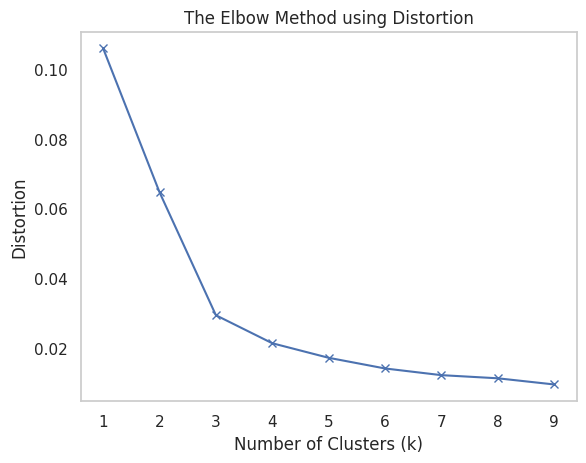

In [105]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store distortion and inertia values
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

# Fit K-means for different values of k
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)

    # Calculate distortion as the average squared distance from points to their cluster centers
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])

    # Inertia is calculated directly by KMeans
    inertias.append(kmeanModel.inertia_)

    # Store the mappings for easy access
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')
# Plotting the graph of k versus Distortion
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.grid()
plt.show()

In [106]:
# Assigning data points to clusters using K-Means with 3 clusters
kmeans_final = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_final.fit_predict(X)

array([0, 0, 0, ..., 4, 4, 3], dtype=int32)

In [107]:
import pickle
pickle.dump(kmeans_final, open('kmean_final.pkl', 'wb'))

In [108]:
#See the predictions
kmeans_final.labels_
# kmeans_final.cluster_centers_

results["kmeans_cluster"] = kmeans_final.labels_

In [124]:
results.head()

,pca1,pca2,kmeans_cluster,Paragraph,cluster_name
0,-0.073110,-0.514303,0,budget set scene election gordon brown seek pu...,Politics
1,0.099182,-0.323010,0,army chiefs regiments decision military chiefs...,Politics
2,-0.164664,-0.463920,0,howard denies split id cards michael howard de...,Politics
3,-0.061683,-0.442289,0,observers monitor uk election ministers invite...,Politics
4,0.116586,-0.358509,0,kilroy names election seat target ex chat show...,Politics


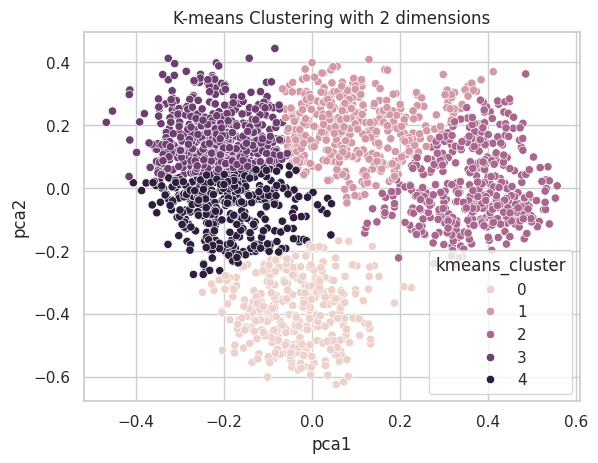

In [109]:
sns.scatterplot(x="pca1", y="pca2", hue=results["kmeans_cluster"], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


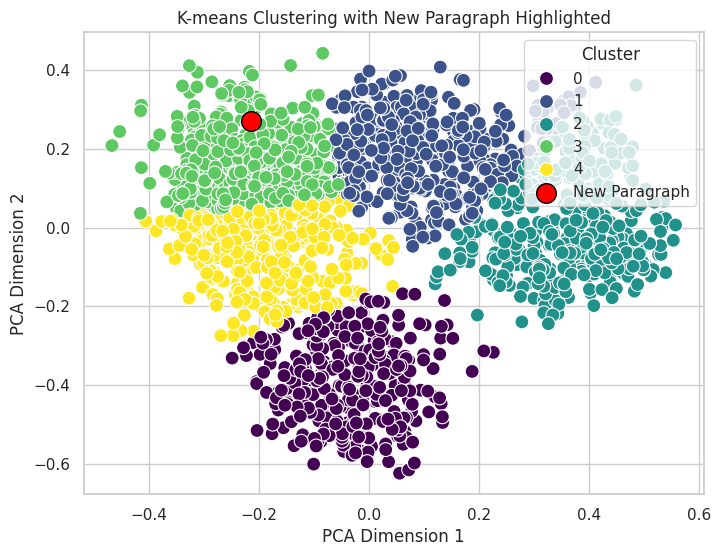

The new paragraph belongs to cluster: 3


In [110]:
##
# New paragraph to classify
new_paragraph = "AI is an entermaint industries by enabling intelligent systems."

# Compute embedding for the new paragraph
new_embedding = model.encode([new_paragraph])


# Reduce the new embedding to 2 dimensions using the fitted PCA
new_pca_point = pca.transform(new_embedding)

# Predict the cluster for the new paragraph
new_cluster = kmeans_final.predict(new_pca_point )[0]
new_cluster

# Add the new point to the plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="pca1", y="pca2", hue=results["kmeans_cluster"], data=results, palette="viridis", s=100
)
plt.scatter(
    new_pca_point[0, 0],
    new_pca_point[0, 1],
    c="red",
    s=200,
    label="New Paragraph",
    edgecolor="black"
)
plt.title("K-means Clustering with New Paragraph Highlighted")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(title="Cluster", loc='upper right')
plt.show()

print(f"The new paragraph belongs to cluster: {new_cluster}")

In [111]:
results.head()

,pca1,pca2,kmeans_cluster
0,-0.073110,-0.514303,0
1,0.099182,-0.323010,0
2,-0.164664,-0.463920,0
3,-0.061683,-0.442289,0
4,0.116586,-0.358509,0


In [112]:
results['Paragraph'] =  df['paragraph']
results.head()

,pca1,pca2,kmeans_cluster,Paragraph
0,-0.073110,-0.514303,0,budget set scene election gordon brown seek pu...
1,0.099182,-0.323010,0,army chiefs regiments decision military chiefs...
2,-0.164664,-0.463920,0,howard denies split id cards michael howard de...
3,-0.061683,-0.442289,0,observers monitor uk election ministers invite...
4,0.116586,-0.358509,0,kilroy names election seat target ex chat show...


In [113]:
# Calculate TF-IDF for each cluster
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

# Calculate TF-IDF for each cluster
tfidf_vectorizer = TfidfVectorizer(stop_words="english")  # Ignore common stop words
top_words_per_cluster = {}

for cluster_id in results["kmeans_cluster"].unique():
    # Filter paragraphs belonging to the current cluster
    cluster_docs = results[results["kmeans_cluster"] == cluster_id]["Paragraph"]

    # Compute TF-IDF for the cluster documents
    tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_docs)
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Compute average TF-IDF scores per word
    avg_tfidf_scores = tfidf_matrix.mean(axis=0).A1
    tfidf_scores = dict(zip(feature_names, avg_tfidf_scores))

    # Extract top 10 words based on TF-IDF scores
    top_words = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:100]
    top_words_per_cluster[cluster_id] = [word for word, score in top_words]


cluster_0 = []
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
# Display top words for each cluster
for cluster_id, top_words in top_words_per_cluster.items():
    print(f"Cluster {cluster_id}: Top 100 Words")

    print(", ".join(top_words))
    print("-" * 40)
    cluster_0.append(top_words)
    cluster_1.append(top_words)
    cluster_2.append(top_words)
    cluster_3.append(top_words)
    cluster_4.append(top_words)

Cluster 0: Top 100 Words
said, mr, labour, election, blair, brown, party, government, people, howard, tax, minister, new, chancellor, uk, lord, prime, tory, plans, tories, told, public, britain, say, campaign, home, lib, leader, year, secretary, general, bbc, kennedy, mps, police, eu, says, budget, vote, law, blunkett, tony, immigration, ukip, lords, local, bn, michael, house, time, make, liberal, council, services, british, spokesman, added, issue, voters, country, taxes, asylum, years, iraq, report, parties, world, work, conservative, political, think, spending, foreign, way, dems, clarke, week, saying, going, ministers, war, office, want, claims, conservatives, commons, gordon, expected, like, rights, issues, economy, politics, london, parliament, mp, anti, change, set, cut
----------------------------------------
Cluster 4: Top 100 Words
said, mr, bn, year, people, government, bank, uk, economy, new, growth, economic, market, china, world, company, dollar, prices, eu, rates, rate, 

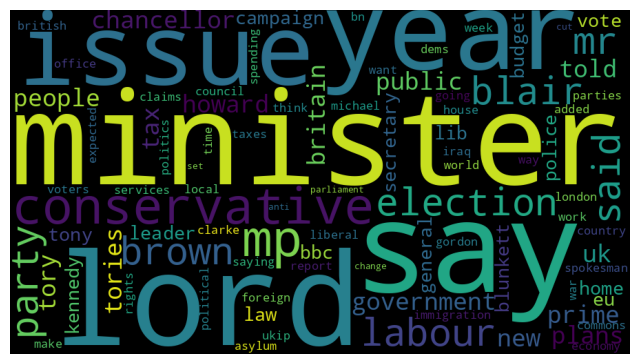

In [114]:
all_cleaned_text = " ".join(cluster_0[0])
word_cld = WordCloud(width=900, height=500).generate(all_cleaned_text)
plt.figure(figsize=(8,6))
plt.imshow(word_cld)
plt.axis("off")
plt.show()

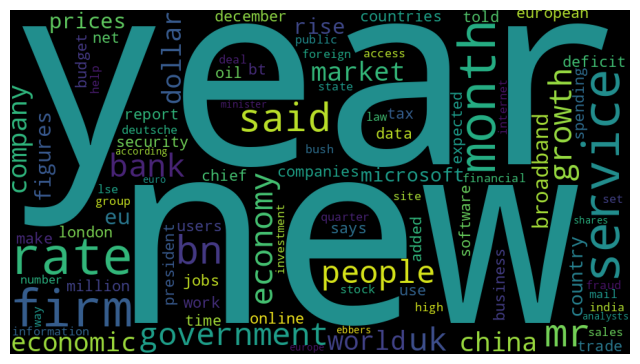

In [115]:
all_cleaned_text = " ".join(cluster_1[1])
word_cld = WordCloud(width=900, height=500).generate(all_cleaned_text)
plt.figure(figsize=(8,6))
plt.imshow(word_cld)
plt.axis("off")
plt.show()

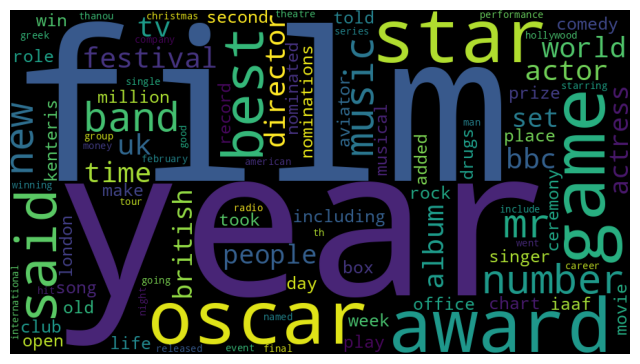

In [116]:
all_cleaned_text = " ".join(cluster_2[2])
word_cld = WordCloud(width=900, height=500).generate(all_cleaned_text)
plt.figure(figsize=(8,6))
plt.imshow(word_cld)
plt.axis("off")
plt.show()

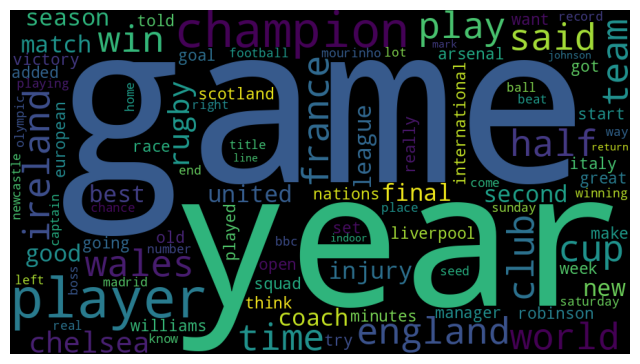

In [117]:
all_cleaned_text = " ".join(cluster_3[3])
word_cld = WordCloud(width=900, height=500).generate(all_cleaned_text)
plt.figure(figsize=(8,6))
plt.imshow(word_cld)
plt.axis("off")
plt.show()

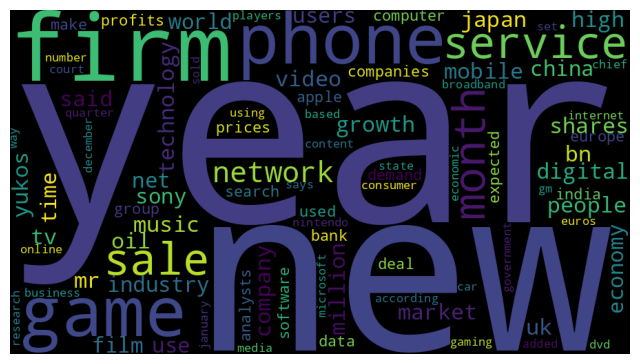

In [118]:
all_cleaned_text = " ".join(cluster_4[4])
word_cld = WordCloud(width=900, height=500).generate(all_cleaned_text)
plt.figure(figsize=(8,6))
plt.imshow(word_cld)
plt.axis("off")
plt.show()

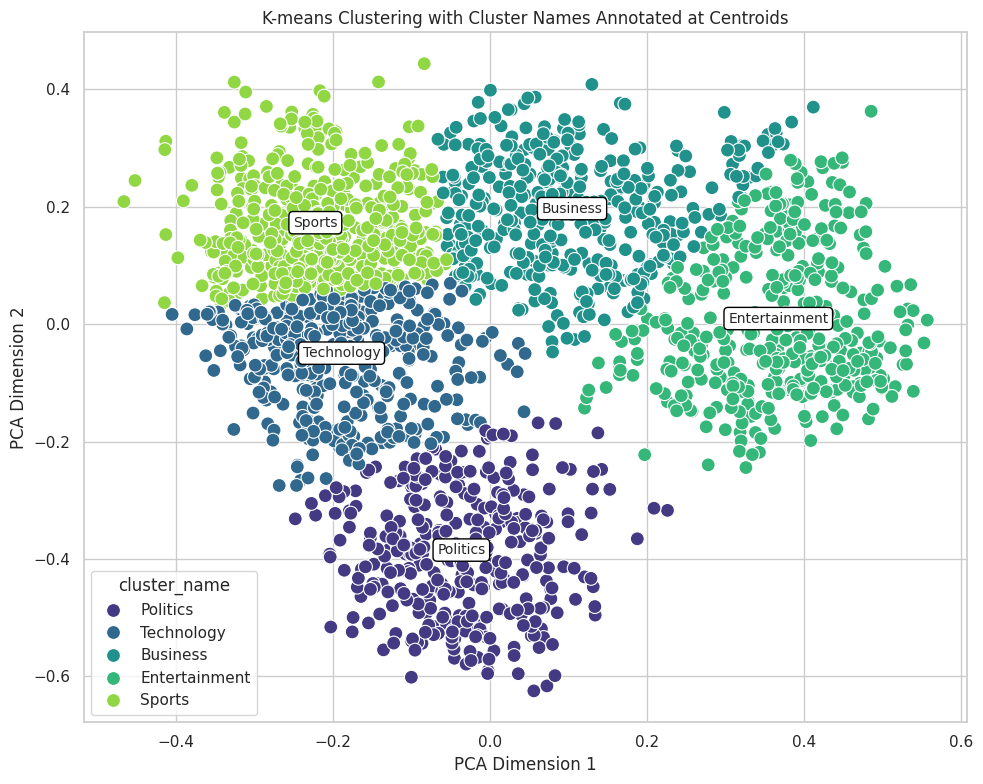

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define cluster names
cluster_names = {
    0: "Politics",
    1: "Business",
    2: "Entertainment",
    3: "Sports",
    4: "Technology",
}

# Map cluster IDs to names
results["cluster_name"] = results["kmeans_cluster"].map(cluster_names)

# Calculate centroids for each cluster
centroids = results.groupby("kmeans_cluster")[["pca1", "pca2"]].mean()

# Plot with centroids labeled
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Scatter plot
scatter = sns.scatterplot(
    x="pca1",
    y="pca2",
    hue="cluster_name",
    data=results,
    palette="viridis",
    s=100
)

# Annotate centroids with cluster names
for cluster_id, (x, y) in centroids.iterrows():
    plt.text(
        x, y,
        cluster_names[cluster_id],
        fontsize=10,
        ha='center',  # Center-align text
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')  # Add a box around the text
    )

# Plot formatting
plt.title("K-means Clustering with Cluster Names Annotated at Centroids")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
# plt.legend(title="Cluster Name", loc='upper right')
plt.tight_layout()
plt.show()
